## Image Classifier using tensorflow 


In [38]:
!pip install matplotlib
!pip install tensorflow
!pip install keras
!pip install numpy
!pip install pydot
!pip install graphviz
!pip install pandas
!pip install pydotplus


In [39]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [40]:
keras.__version__

'2.6.0'

In [41]:
tf.__version__


'2.6.0'

### Dataset

Fashion mnist from keras which is a labelled dataset

--------------------------
|labels |   Classes  |
|---:|:-----------|
|0           |  T-shirt/top |
|1           |   Trouser |
|2           |  Pullover|
|3           |    Dress |
|4           |    Coat|
|5           |   Sandal |
|6           |    Shirt|
|7           |    Sneaker|
|8           |    Bag|
|9           |    Ankle boot|



In [42]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
##taking dataset from keras
##loading train and test data from dataset


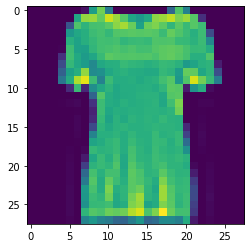

In [43]:
plt.imshow(train_images[10])
### to view different images in the dataset

In [44]:
train_labels[6]
### to view corresponding label assigned in the dataset

7

In [45]:
class_name = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

## assigning class names for reference


In [46]:
class_name[train_labels[6]]

'Sneaker'

In [47]:
train_images[6]
## if we dont use plt.imshow we can see the object structure thats a 28*28 pixel values of the image each pixel lies between 0 and 255 (int is 8)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

### Normalization

It is the process of scaling the dataset to a smaller range of values so that more accurate comparisons can be made. In the fashion mnist dataset, 
pixels have values from 0 to 255 which gives a range of hues, to make it grayscale we can divide the training data by 255.

Here we know the scale so we are easily dividing by 255. For typical ML models where scale is unknown, we subtract the mean and divide the result
by its standard deviation value.






In [48]:
tr_img_norm=(train_images/255.)
tst_img_norm=(test_images/255.)

#### Split the data into train/validation/test datasets
In the earlier step of importing the date, we had 60,000 datasets for training and 10,000 test datasets. Now we further split the training data into train/validation. Here is how each type of dateset is used in deep learning:

* __Training data__ — used for training the model
* __Validation data__ — used for tuning the hyperparameters and evaluate the models
* __Test data__ — used to test the model after the model has gone through initial vetting by the validation set.

In [49]:
im_val, train_images = tr_img_norm[:5000], tr_img_norm[5000:]

### first 5k images will be used for validation (im_val), next 55000 will be training dataset (5k to 60k)
labels_val, train_labels = train_labels[:5000], train_labels[5000:]
### first 5k labels will be used for validation(labels_val), next 55000 will be training dataset (5k to 60k)

test_images = tst_img_norm



In [50]:
train_images[1]
## we are viewing the second imaage data and we can see its between 0 and 1

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.17254902, 0.21568627, 0.37647059,
        0.78823529, 0.1372549 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.23529412, 0.72156863, 0.20784314,
        0.19607843, 0.06666667, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.35686275, 0.40784314, 0.3254902 , 0.17254902,
        0.70196078, 0.95294118, 0.83921569, 0.61176471, 0.58039216,
        0.83137255, 0.97254902, 1.        , 0.72156863, 0.15686275,
        0.3372549 , 0.42745098, 0.30588235, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.29411765, 0.55686275, 0.19607843, 0.29411765, 0.23529412,
        0.08235294, 0.38431373, 0.83137255, 0.8745098 , 0.73333333,
        0.90980392, 0.8313

### test train split

more accurate learning models keep the test data as unseen

### Building and training the model

1. set the same seed for both np and tf
2. create a model object which is sequential in nature
3. add input layer using model.add, define shape of input layer
4. add hidden layer using model.add, which is dense layer, specify num of neurons and activation type
5. output layer is defined with num of neurons and activation type



In [51]:
import numpy as np
np.random.seed(42)
tf.random.set_seed(42)
## set the same seed values

In [52]:
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28, 28]))
##define shape of input layer - we use flatten to 28*28 which is 2D to 784 in 1D
model.add(keras.layers.Dense(300, activation="relu"))
##4. add hidden layer using model.add, which is dense layer, with 300 neurons and ReLu activation
model.add(keras.layers.Dense(100, activation="relu"))
## add hidden layer using model.add, which is dense layer, with 100 neurons and ReLu activation

model.add(keras.layers.Dense(10, activation="softmax"))
##5. output layer is defined with num of neurons and activation type


In [53]:
model.summary()
## view the built model
## None - since no batch size has been defined for the data.
## 235500 - 784*300+300 >> these many trainable parameters are to be optimised
##30100 - 300*100  + 100 >> weights and biases are considered  and these many trainable parameters are to be optimised
#1010 - these many trainable parameters are to be optimised

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [54]:
#!/usr/bin/python3 -m pip install --upgrade pip

In [55]:
import pydot


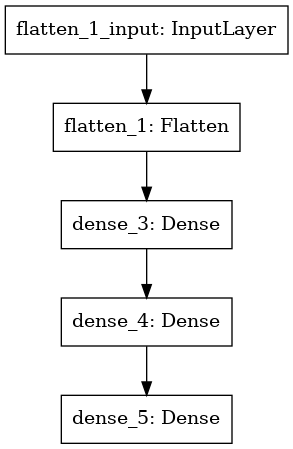

In [56]:
keras.utils.plot_model(model)

# here (model) is the name of object that contains our ML model

In [57]:
weights, biases= model.layers[1].get_weights()
#here model again is our object name

In [58]:
weights
## displays randomly assigned weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [59]:
weights.shape

(784, 300)

In [60]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [61]:
biases.shape

(300,)

# Compiling and training the neural network model

* Syntax : Model.compile(
    optimizer="rmsprop",
    loss=None,
    metrics=None,
    loss_weights=None,
    weighted_metrics=None,
    run_eagerly=None,
    steps_per_execution=None,
    **kwargs
)
## Types of losses :
a. Binary classification
1. Binary Cross Entropy : cross-entropy loss between the predicted classes and the true classes.

b. Multiclass classification

1. Categorical Crossentropy
The CategoricalCrossentropy also computes the cross-entropy loss between the true classes and predicted classes. The labels are given in an one_hot format. 

2. Sparse Categorical Crossentropy
If you have two or more classes and  the labels are integers, the SparseCategoricalCrossentropy should be used. 

3. The Poison Loss
You can also use the Poisson class to compute the poison loss. It’s a great choice if your dataset comes from a Poisson distribution for example the number of calls a call center receives per hour. 

4. Kullback-Leibler Divergence Loss
The relative entropy can be computed using the KLDivergence class. According to the official docs at PyTorch:

KL divergence is a useful distance measure for continuous distributions and is often useful when performing direct regression over the space of (discretely sampled) continuous output distributions. 




In [62]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])
## we are using this since there are labels in our y(test) variable,
### we could use categorical crossentropy if we were using numerical values as y
## sgd -->> stochastic gradient descent tells keras to perform back propogation
##metric is accuracy for classification, for regression we can use mean square

In [68]:
model_history=model.fit(train_images,train_labels,epochs=50,validation_data=(im_val,labels_val))
#model_history=model.fit(train_images,train_labels,epochs=50,validation_data=(im_val,labels_val))
## use model.fit twice to make the model converge



2021-08-31 14:54:39.263025: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 172480000 exceeds 10% of free system memory.


Epoch 1/50
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1597 - accuracy: 0.9438 - val_loss: 0.2928 - val_accuracy: 0.8966
Epoch 2/50
1719/1719 [==============================] - 2s 1000us/step - loss: 0.1580 - accuracy: 0.9437 - val_loss: 0.3011 - val_accuracy: 0.8956
Epoch 3/50
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1547 - accuracy: 0.9447 - val_loss: 0.3660 - val_accuracy: 0.8746
Epoch 4/50
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1522 - accuracy: 0.9458 - val_loss: 0.2902 - val_accuracy: 0.8978
Epoch 5/50
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1510 - accuracy: 0.9457 - val_loss: 0.2846 - val_accuracy: 0.9038
Epoch 6/50
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1479 - accuracy: 0.9471 - val_loss: 0.3247 - val_accuracy: 0.8924
Epoch 7/50
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1453 - accuracy: 0.9493 - val_loss: 0.3029 - val_accura

In [69]:
labels_val.shape

(5000,)

In [70]:
model_history.params
## to view parameters of our model

{'verbose': 1, 'epochs': 50, 'steps': 1719}

In [71]:
model_history.history
# displays loss, val_accuracy, accuracy and val_loss in a dictionary format(1D) for all 50 epochs

{'loss': [0.06938036531209946,
  0.0696454644203186,
  0.0672021210193634,
  0.06591276824474335,
  0.06549196690320969,
  0.06422954797744751,
  0.06195806711912155,
  0.061322279274463654,
  0.061419256031513214,
  0.059473831206560135,
  0.05983419343829155,
  0.05732463672757149,
  0.057399339973926544,
  0.05529778078198433,
  0.05354442074894905,
  0.053921621292829514,
  0.05202711373567581,
  0.05001483112573624,
  0.05171703174710274,
  0.04907221719622612,
  0.049901414662599564,
  0.04856473207473755,
  0.04788648337125778,
  0.046016547828912735,
  0.04529834911227226,
  0.046605560928583145,
  0.04506804421544075,
  0.042310409247875214,
  0.043524324893951416,
  0.0436902716755867,
  0.040266215801239014,
  0.03916410356760025,
  0.04090077802538872,
  0.03906302899122238,
  0.03598550334572792,
  0.03681689873337746,
  0.03546946868300438,
  0.034942541271448135,
  0.03505393862724304,
  0.03565564379096031,
  0.0337408185005188,
  0.031739190220832825,
  0.0335814729332

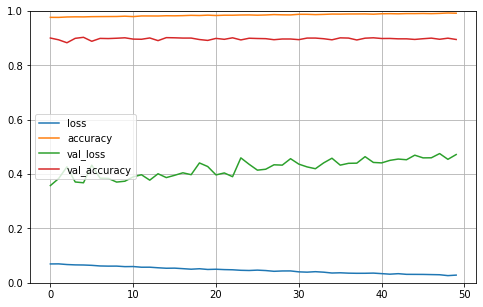

In [72]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize=(8,5))
## for plotting graph
plt.grid(True)
## enables grids
plt.gca().set_ylim(0,1)
## setting limit for y axis scaled to 1

plt.show()

## used model.fit twice to make this converge

In [73]:
model.evaluate(test_images, test_labels)
## 88% accuracy since we did model.fit twice and also cause we used 50 epochs

313/313 [==============================] - 0s 881us/step - loss: 0.5252 - accuracy: 0.8893


[0.5252181887626648, 0.8892999887466431]

### Evaluation and checking prediction 

We will check if our model is able to predict unseen data


In [78]:
unseen_images=test_images[:3]
# taking 3 images from our test samples
#We will check if our model is able to predict unseen data



In [89]:
ulab_prob=model.predict(unseen_images)
ulab_prob.round()
##round=2 rounds of probabilities to two decimal values


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [91]:

predict_class=model.predict(unseen_images) 
classes_labels=np.argmax(predict_class,axis=1)
classes_labels

# used instead of predict_classes, here we can see the classes that 3 images belong to



array([9, 2, 1])

In [93]:
np.array(class_name)[classes_labels]
# mapping class names to values

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

AxesImage(54,36;334.8x217.44)


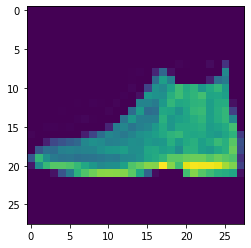

In [97]:
print(plt.imshow(unseen_images[0]))

# cross checking the results

AxesImage(54,36;334.8x217.44)


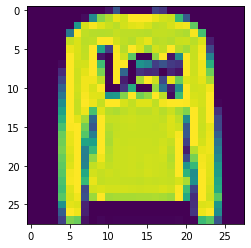

In [98]:
print(plt.imshow(unseen_images[1]))

AxesImage(54,36;334.8x217.44)


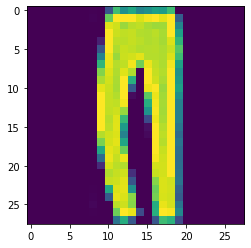

In [99]:
print(plt.imshow(unseen_images[2]))